In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('SQL_out.csv')
df.info

print(df.shape)
print(df.describe())

(792, 17)
              age  physical_activity       sleep
count  792.000000         792.000000  792.000000
mean    35.083333         149.671717    7.021465
std      8.780401           5.544287    0.209252
min      0.000000          60.000000    7.000000
25%     29.000000         150.000000    7.000000
50%     34.000000         150.000000    7.000000
75%     40.000000         150.000000    7.000000
max     67.000000         160.000000   10.000000


In [2]:
df

,mental_health_benefits,learning_resources,anonymity,medical_leave,medical_coverage,mental_health_disorder,diagnosed,past_mental_health_disorder,sought_treatment,family_history,work_interference,age,gender,race,country,physical_activity,sleep
0,Yes,Yes,Yes,Somewhat difficult,NaN,Possibly,NaN,Yes,1,Yes,Rarely,57,Female,NaN,Canada,150,7
1,Yes,I don't know,I don't know,Somewhat difficult,NaN,Yes,Yes,Yes,1,Yes,Sometimes,29,male,White,United States of America,150,7
2,Yes,No,I don't know,Somewhat easy,NaN,No,NaN,No,0,Yes,Not applicable to me,46,Male,White,United States of America,150,7
3,No,No,I don't know,Neither easy nor difficult,NaN,No,NaN,No,0,No,Not applicable to me,34,male,NaN,Norway,150,7
4,Yes,Yes,Yes,Somewhat easy,NaN,Yes,Yes,Yes,1,Yes,Rarely,29,Ostensibly Male,White,United States of America,150,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,NaN,NaN,NaN,NaN,1,No,NaN,Yes,1,No,Rarely,24,mail,NaN,Pakistan,150,7
788,NaN,NaN,NaN,NaN,1,Don't Know,NaN,Possibly,0,I don't know,Sometimes,44,Male,NaN,Brazil,150,7
789,NaN,NaN,NaN,NaN,1,Possibly,NaN,Yes,1,I don't know,Often,35,male,NaN,India,150,7
790,NaN,NaN,NaN,NaN,1,No,NaN,No,0,No,Not applicable to me,30,Female,NaN,Australia,150,7


In [3]:
## missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)
print(df.isnull().sum())

                             Total   Percent
medical_coverage               663  0.837121
diagnosed                      443  0.559343
race                           280  0.353535
mental_health_benefits         129  0.162879
anonymity                      129  0.162879
medical_leave                  129  0.162879
learning_resources             129  0.162879
gender                           9  0.011364
past_mental_health_disorder      7  0.008838
physical_activity                0  0.000000
country                          0  0.000000
sought_treatment                 0  0.000000
age                              0  0.000000
work_interference                0  0.000000
family_history                   0  0.000000
mental_health_disorder           0  0.000000
sleep                            0  0.000000
mental_health_benefits         129
learning_resources             129
anonymity                      129
medical_leave                  129
medical_coverage               663
mental_health_d

In [4]:
# Nan
defaultNum = 0
defaultName = 'NaN'

numFeatures = ['age', 'physical_activity', 'sleep']
nameFeatures = ['mental_health_benefits','learning_resources', 'anonymity', 'medical_leave',
                'medical_coverage','mental_health_disorder', 'diagnosed',
                'past_mental_health_disorder','sought_treatment', 'family_history',
                'work_interference', 'gender','race', 'country']

# Cleaning NaN values
for i in df:
    if i in numFeatures:
        df[i] = df[i].fillna(defaultNum)
    elif i in nameFeatures:
        df[i] = df[i].fillna(defaultName)
    else:
        print('Error: Feature %s not recognized.' % i)
df.head(5)

,mental_health_benefits,learning_resources,anonymity,medical_leave,medical_coverage,mental_health_disorder,diagnosed,past_mental_health_disorder,sought_treatment,family_history,work_interference,age,gender,race,country,physical_activity,sleep
0,Yes,Yes,Yes,Somewhat difficult,NaN,Possibly,NaN,Yes,1,Yes,Rarely,57,Female,NaN,Canada,150,7
1,Yes,I don't know,I don't know,Somewhat difficult,NaN,Yes,Yes,Yes,1,Yes,Sometimes,29,male,White,United States of America,150,7
2,Yes,No,I don't know,Somewhat easy,NaN,No,NaN,No,0,Yes,Not applicable to me,46,Male,White,United States of America,150,7
3,No,No,I don't know,Neither easy nor difficult,NaN,No,NaN,No,0,No,Not applicable to me,34,male,NaN,Norway,150,7
4,Yes,Yes,Yes,Somewhat easy,NaN,Yes,Yes,Yes,1,Yes,Rarely,29,Ostensibly Male,White,United States of America,150,7


In [5]:
#clean 'Gender'

print(type('gender'))

#Select unique elements
gender = df['gender'].unique()
#print(df['gender'])

#Made gender groups
male_string = ['male', 'Male', 'Male ', 'Ostensibly Male', 'male, born with xy chromosoms', 'Malel',
               'M', 'MALE', 'm', 'Cis-male', 'Male ', 'cis male', 'Cis Male', 'Man',
               'Cisgender male', 'Let\'s keep it simple and say male""""',
               'Identify as male', 'Masculine', 'Cishet male','I have a penis', 'man',
               'masculino', 'Make', 'CIS Male','mail']
trans_string = ['Trans man', 'transgender', 'Trans woman', 'Trans female']
female_string = ['Female', 'Female ', 'female', 'Woman', 'woman', 'F', 'f', 'I identify as female',
                 '*shrug emoji* (F)', 'Female/gender non-binary.', 'Cis woman',
                 'Female (cisgender)', 'Cis-Female', 'Cisgendered woman', 'She/her/they/them',
                 'Cis female ', 'cisgender female', 'Female-identified', 'cis woman', 'femmina',
                 'Femile', 'Female (cis)']
other_string = ['Agender', 'SWM', 'Genderqueer', 'NaN', '*shrug emoji* (F)', 'Nonbinary', 'Male (or female, or both)',
                'non binary', 'genderfluid' 'Genderqueer', 'genderfluid', 'genderqueer', 'Demiguy', 'none', 'non-binary', 'Other',
                'NB', 'Genderfluid', 'Nonbinary/femme', 'gender non-conforming woman', 'Non-binary',
                'Non binary', 'None', 'agender', 'Questioning', 'rr', 'Agender trans woman', '43',
                'I am a Wookie', 'Trans non-binary/genderfluid', 'Non-binary and gender fluid']

for (row, col) in df.iterrows():
    if col.gender in male_string:
        df['gender'].replace(to_replace = col.gender, value = 'male', inplace = True)
for (row, col) in df.iterrows():
    if col.gender in female_string:
        df['gender'].replace(to_replace = col.gender, value = 'female', inplace = True)
for (row, col) in df.iterrows():
    if col.gender in trans_string:
        df['gender'].replace(to_replace = col.gender, value = 'trans', inplace = True)
for (row, col) in df.iterrows():
    if col.gender in other_string:
        df['gender'].replace(to_replace = col.gender, value = 'other', inplace = True)
        
print(df['gender'])

<class 'str'>
0      female
1        male
2        male
3        male
4        male
        ...  
787      male
788      male
789      male
790    female
791    female
Name: gender, Length: 792, dtype: object


In [6]:
# Clean outliers from 'Age'
df = df.drop(df[(df.age < 16)].index)
df.age.unique()

array([57, 29, 46, 34, 55, 35, 33, 37, 45, 31, 38, 26, 27, 47, 32, 36, 30,
       44, 19, 61, 52, 39, 28, 43, 42, 24, 25, 23, 20, 41, 40, 22, 53, 67,
       56, 54, 49, 21, 51, 48, 65, 50, 58, 64, 60, 63, 59])

In [7]:
# Clean 'sought treatment'

# Made groups
one = ['TRUE']
zero = ['FALSE']


for (row, col) in df.iterrows():
    if col.sought_treatment in one:
        df['sought_treatment'].replace(to_replace = col.sought_treatment, value = '1', inplace = True)
for (row, col) in df.iterrows():
    if col.sought_treatment in zero:
        df['sought_treatment'].replace(to_replace = col.sought_treatment, value = '0', inplace = True)
        
print(df['sought_treatment'])

0      1
1      1
2      0
3      0
4      1
      ..
787    1
788    0
789    1
790    0
791    1
Name: sought_treatment, Length: 789, dtype: object


In [8]:
# clean 'medical coverage'

# Made groups
one = ['TRUE']
zero = ['FALSE']


for (row, col) in df.iterrows():
    if col.medical_coverage in one:
        df['medical_coverage'].replace(to_replace = col.medical_coverage, value = '1', inplace = True)
for (row, col) in df.iterrows():
    if col.medical_coverage in zero:
        df['medical_coverage'].replace(to_replace = col.medical_coverage, value = '0', inplace = True)
        
print(df['medical_coverage'])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
787      1
788      1
789      1
790      1
791      1
Name: medical_coverage, Length: 789, dtype: object


In [9]:
df['gender'].unique()

array(['female', 'male', 'other', 'trans'], dtype=object)

In [10]:
# To see all the rows, please uncomment
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(df)

In [11]:
df

,mental_health_benefits,learning_resources,anonymity,medical_leave,medical_coverage,mental_health_disorder,diagnosed,past_mental_health_disorder,sought_treatment,family_history,work_interference,age,gender,race,country,physical_activity,sleep
0,Yes,Yes,Yes,Somewhat difficult,NaN,Possibly,NaN,Yes,1,Yes,Rarely,57,female,NaN,Canada,150,7
1,Yes,I don't know,I don't know,Somewhat difficult,NaN,Yes,Yes,Yes,1,Yes,Sometimes,29,male,White,United States of America,150,7
2,Yes,No,I don't know,Somewhat easy,NaN,No,NaN,No,0,Yes,Not applicable to me,46,male,White,United States of America,150,7
3,No,No,I don't know,Neither easy nor difficult,NaN,No,NaN,No,0,No,Not applicable to me,34,male,NaN,Norway,150,7
4,Yes,Yes,Yes,Somewhat easy,NaN,Yes,Yes,Yes,1,Yes,Rarely,29,male,White,United States of America,150,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,NaN,NaN,NaN,NaN,1,No,NaN,Yes,1,No,Rarely,24,male,NaN,Pakistan,150,7
788,NaN,NaN,NaN,NaN,1,Don't Know,NaN,Possibly,0,I don't know,Sometimes,44,male,NaN,Brazil,150,7
789,NaN,NaN,NaN,NaN,1,Possibly,NaN,Yes,1,I don't know,Often,35,male,NaN,India,150,7
790,NaN,NaN,NaN,NaN,1,No,NaN,No,0,No,Not applicable to me,30,female,NaN,Australia,150,7


In [12]:
df.mental_health_benefits.unique()

array(['Yes', 'No', 'Not eligible for coverage / NA', "I don't know",
       'NaN'], dtype=object)

In [13]:
df.medical_coverage.unique()

array(['NaN', '1', '0'], dtype=object)

In [14]:
df.anonymity.unique()

array(['Yes', "I don't know", 'No', 'NaN'], dtype=object)

In [15]:
df.mental_health_disorder.unique()

array(['Possibly', 'Yes', 'No', "Don't Know"], dtype=object)

In [16]:
df.diagnosed.unique()

array(['NaN', 'Yes', 'No'], dtype=object)

In [17]:
df.past_mental_health_disorder.unique()

array(['Yes', 'No', "Don't Know", 'Possibly', 'NaN'], dtype=object)

In [18]:
df.sought_treatment.unique()

array(['1', '0'], dtype=object)

In [19]:
df.family_history.unique()

array(['Yes', 'No', "I don't know"], dtype=object)

In [20]:
df.age.unique()

array([57, 29, 46, 34, 55, 35, 33, 37, 45, 31, 38, 26, 27, 47, 32, 36, 30,
       44, 19, 61, 52, 39, 28, 43, 42, 24, 25, 23, 20, 41, 40, 22, 53, 67,
       56, 54, 49, 21, 51, 48, 65, 50, 58, 64, 60, 63, 59])

In [21]:
df.gender.unique()

array(['female', 'male', 'other', 'trans'], dtype=object)

In [22]:
df.physical_activity.unique()

array([150, 160])

In [23]:
df.sleep.unique()

array([7, 8])

In [24]:
from sklearn import preprocessing

labelDict = {}
for i in df:
    if i != 'age':
        le = preprocessing.LabelEncoder()
        le.fit(df[i])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        df[i] = le.transform(df[i])
        # Get labels
        labelKey = 'label_' + i
        labelValue = [*le_name_mapping]
        labelDict[labelKey] =labelValue

for key, value in labelDict.items():     
    print(key, value)
df.head()

label_mental_health_benefits ["I don't know", 'NaN', 'No', 'Not eligible for coverage / NA', 'Yes']
label_learning_resources ['Does your employer offer resources to learn more about mental health disorders and options for seeking help?', "I don't know", 'NaN', 'No', 'Yes']
label_anonymity ["I don't know", 'NaN', 'No', 'Yes']
label_medical_leave ['Difficult', "I don't know", 'NaN', 'Neither easy nor difficult', 'Somewhat difficult', 'Somewhat easy', 'Very easy']
label_medical_coverage ['0', '1', 'NaN']
label_mental_health_disorder ["Don't Know", 'No', 'Possibly', 'Yes']
label_diagnosed ['NaN', 'No', 'Yes']
label_past_mental_health_disorder ["Don't Know", 'NaN', 'No', 'Possibly', 'Yes']
label_sought_treatment ['0', '1']
label_family_history ["I don't know", 'No', 'Yes']
label_work_interference ['Never', 'Not applicable to me', 'Often', 'Rarely', 'Sometimes']
label_gender ['female', 'male', 'other', 'trans']
label_race ['American Indian or Alaska Native', 'Asian', 'Black or African Americ

,mental_health_benefits,learning_resources,anonymity,medical_leave,medical_coverage,mental_health_disorder,diagnosed,past_mental_health_disorder,sought_treatment,family_history,work_interference,age,gender,race,country,physical_activity,sleep
0,4,4,3,4,2,2,0,4,1,2,3,57,0,8,9,0,0
1,4,1,0,4,2,3,2,4,1,2,4,29,1,9,50,0,0
2,4,3,0,5,2,1,0,2,0,2,1,46,1,9,50,0,0
3,2,3,0,3,2,1,0,2,0,1,1,34,1,8,36,0,0
4,4,4,3,5,2,3,2,4,1,2,3,29,1,9,50,0,0


In [25]:
df.age.unique()

array([57, 29, 46, 34, 55, 35, 33, 37, 45, 31, 38, 26, 27, 47, 32, 36, 30,
       44, 19, 61, 52, 39, 28, 43, 42, 24, 25, 23, 20, 41, 40, 22, 53, 67,
       56, 54, 49, 21, 51, 48, 65, 50, 58, 64, 60, 63, 59])

In [26]:
df.physical_activity.unique()

array([0, 1])

In [27]:
# final check for missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                             Total  Percent
mental_health_benefits           0      0.0
family_history                   0      0.0
physical_activity                0      0.0
country                          0      0.0
race                             0      0.0
gender                           0      0.0
age                              0      0.0
work_interference                0      0.0
sought_treatment                 0      0.0
learning_resources               0      0.0
past_mental_health_disorder      0      0.0
diagnosed                        0      0.0
mental_health_disorder           0      0.0
medical_coverage                 0      0.0
medical_leave                    0      0.0
anonymity                        0      0.0
sleep                            0      0.0


In [28]:
df.shape

(789, 17)

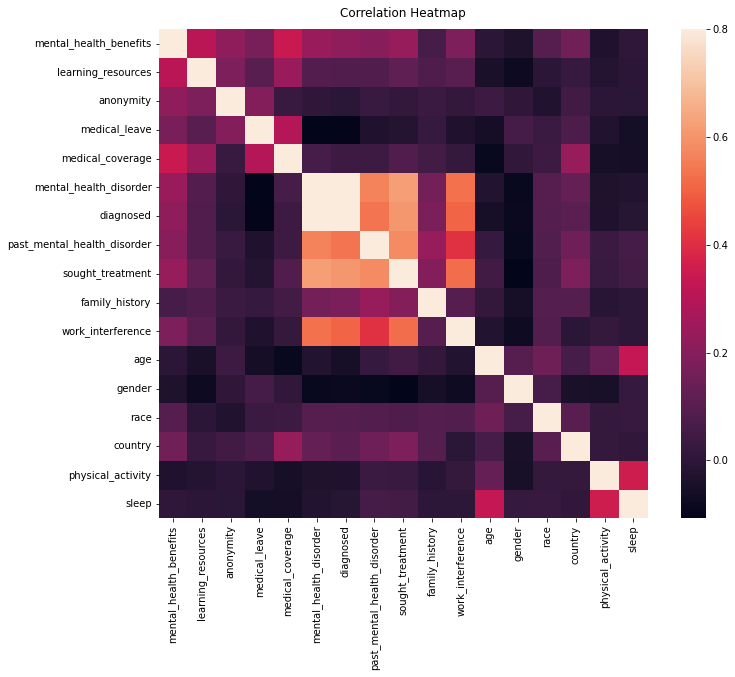

In [29]:
#correlation matrix
import seaborn as sns
matrix = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
heatmap = sns.heatmap(matrix, vmax=.8, square=True);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

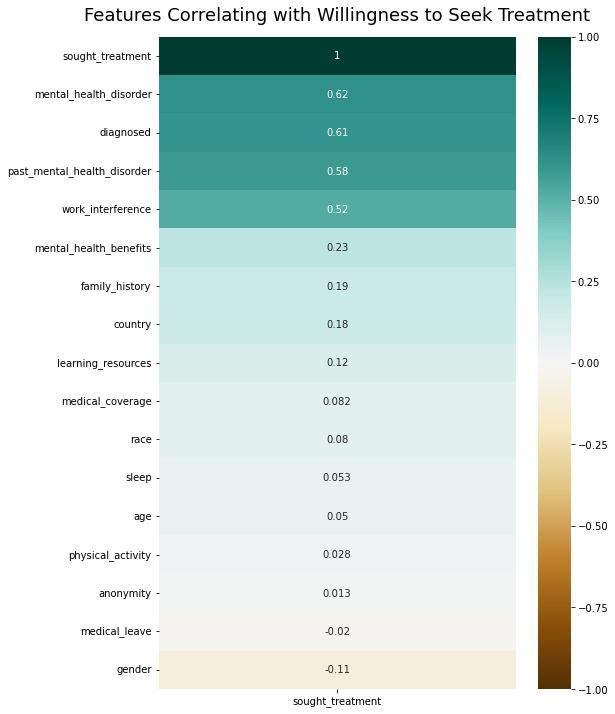

In [30]:
plt.figure(figsize=(8, 12))
heatmap2 = sns.heatmap(df.corr()[['sought_treatment']].sort_values(by='sought_treatment', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap2.set_title('Features Correlating with Willingness to Seek Treatment', fontdict={'fontsize':18}, pad=16);

Text(0.5, 0, 'Age')

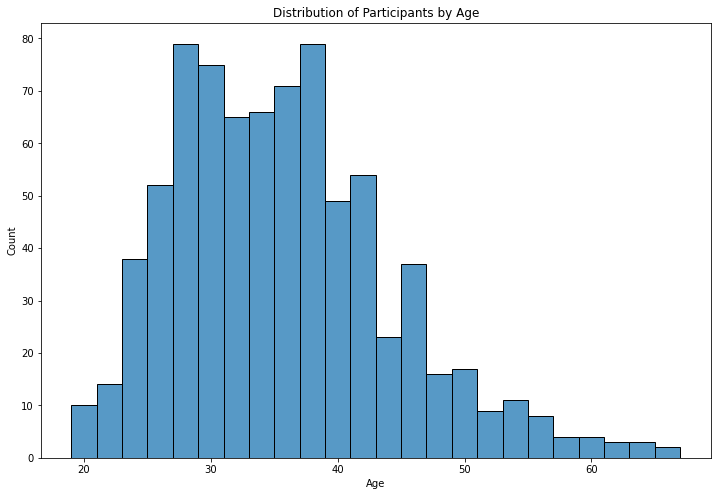

In [31]:
# Distribiution and density by Age
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.histplot(df["age"], bins=24)
plt.title("Distribution of Participants by Age")
plt.xlabel("Age")

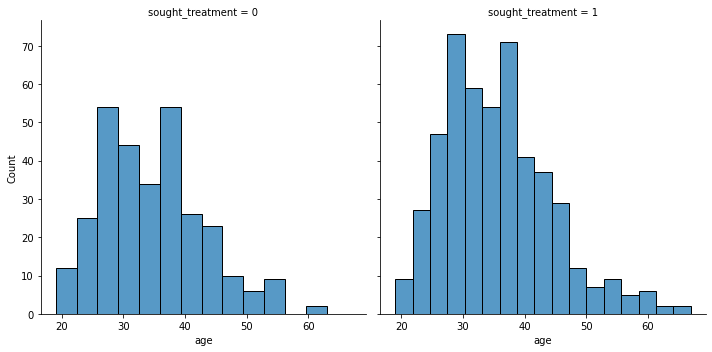

In [32]:
# Age vs treatment and age vs no treatment
j = sns.FacetGrid(df, col='sought_treatment', height=5)
j = j.map(sns.histplot, "age")

Text(0.5, 1.0, 'Total Distribution by treated or not')

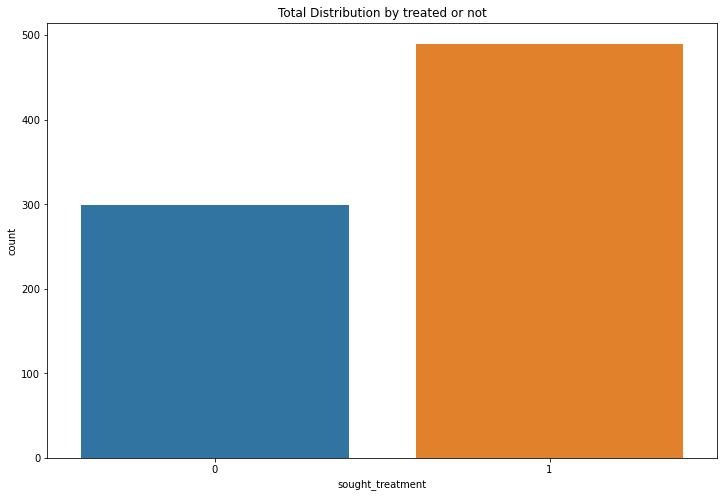

In [33]:
# How many people have been treated

plt.figure(figsize=(12,8))
labels = labelDict['label_sought_treatment']
g = sns.countplot(x='sought_treatment', data=df)
g.set_xticklabels(labels)

plt.title('Total Distribution by treated or not')

In [34]:
# Split x and y
feature_cols = ['mental_health_benefits','family_history','physical_activity','age', 'gender',
                'work_interference','learning_resources','past_mental_health_disorder',
                'medical_coverage','medical_leave','anonymity','sleep', 'mental_health_disorder', 'diagnosed', 'work_interference']
x = df[feature_cols]
y = df.sought_treatment

In [35]:
# Scale x
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)

In [36]:
# Split x and y 
xtr, xts, ytr, yts = train_test_split(X, y, test_size=0.35, random_state=0)

In [37]:
# Create LR Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
df_lr = LogisticRegression(max_iter= 10000)
df_lr.fit(xtr,ytr)

LogisticRegression(max_iter=10000)

In [38]:
ypred = df_lr.predict(xts)

In [39]:
# Create a 1R Baseline Model 
# This will be our Dummy Classifier
# F1 score = 0.383, Precision = 0.380, Recall = 0.5

In [40]:
import dabl

In [41]:
print(ypred)

[0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0
 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1
 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0
 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0
 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0]


In [63]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(yts, ypred)

array([[ 82,  16],
       [ 28, 151]])

In [43]:
df_lr.score(xts, yts)

0.8411552346570397

In [44]:
# Trying Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
df_rf = RandomForestClassifier(n_estimators = 50)
df_rf.fit(xtr, ytr)
df_rf.score(xts, yts)

0.8375451263537906

In [45]:
# Trying Support Vector Machine (SVC)
from sklearn.svm import SVC
df_svm = SVC()
df_svm.fit(xtr, ytr)
df_svm.score(xts, yts)

0.8411552346570397

In [65]:
print(metrics.classification_report(yts, ypred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        98
           1       0.90      0.84      0.87       179

    accuracy                           0.84       277
   macro avg       0.82      0.84      0.83       277
weighted avg       0.85      0.84      0.84       277



In [48]:
# Creating Decision Trees

In [49]:
# define X and y
feature_cols = ['mental_health_benefits','family_history','physical_activity','age', 'gender',
                'work_interference','learning_resources','past_mental_health_disorder',
                'medical_coverage','medical_leave','anonymity','sleep', 'mental_health_disorder', 'diagnosed']
X = df[feature_cols]
y = df.sought_treatment
# split X and y 
xtr, xts, ytr, yts = train_test_split(X, y, test_size=0.35, random_state=0)

In [50]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    
    # train and prune a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(xtr, ytr)
    
    # make class predictions for the testing set
    ypred = tree.predict(xts)
    
    accuracy = metrics.accuracy_score(yts, ypred)
    print('classification accuracy:', accuracy)

treeClassifier()

classification accuracy: 0.8339350180505415


In [66]:
# Seeing which Models work Best
features = ['mental_health_benefits','family_history','physical_activity','age', 'gender',
                'work_interference','learning_resources','past_mental_health_disorder',
                'medical_coverage','medical_leave','anonymity','sleep', 'mental_health_disorder', 'diagnosed']
x = df[feature_cols]
y = df.sought_treatment
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)
sc = dabl.SimpleClassifier().fit(X_train, Y_train)
print("Accuracy score", sc.score(X_test, Y_test))

Running DummyClassifier()
accuracy: 0.599 average_precision: 0.401 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.375
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.599 average_precision: 0.401 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.375

Running GaussianNB()
accuracy: 0.819 average_precision: 0.881 roc_auc: 0.922 recall_macro: 0.837 f1_macro: 0.818
=== new best GaussianNB() (using recall_macro):
accuracy: 0.819 average_precision: 0.881 roc_auc: 0.922 recall_macro: 0.837 f1_macro: 0.818

Running MultinomialNB()
accuracy: 0.857 average_precision: 0.897 roc_auc: 0.935 recall_macro: 0.864 f1_macro: 0.855
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.857 average_precision: 0.897 roc_auc: 0.935 recall_macro: 0.864 f1_macro: 0.855

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.784 average_precision: 0.648 roc_auc: 0.810 recall_macro: 0.810 f1_macro: 0.784
Running DecisionTreeClassifier(class_weight='balanced', max_d

In [53]:
# Shows us Best Model will either be Logistic Regression or Decision Tree Classifier, but we tried LR, DTC, SVC, and Random Forest to see for ourselves.

In [51]:
# Creating Decision Tree Visualization

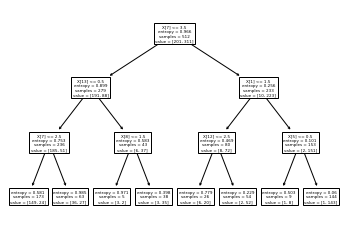

In [54]:
import graphviz
import sklearn.tree as sk
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz

model=tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')
model.fit(xtr,ytr)

sk.plot_tree(model)
plt.show()

In [55]:
from graphviz import Source
from sklearn import tree

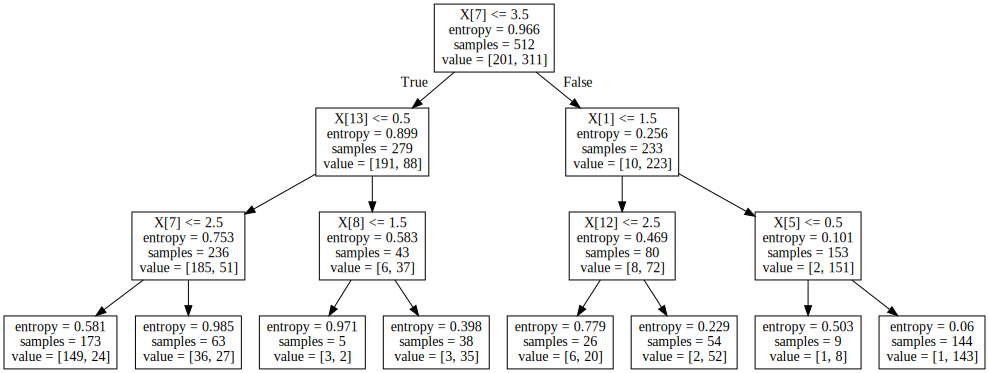

In [56]:
from graphviz import Source
from sklearn import tree
Source(tree.export_graphviz(model, out_file=None))

In [57]:
# Cross Validation
# This checks our model for overfitting

In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [59]:
n_samples = df.shape[0]

In [60]:
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

In [61]:
# 5 Fold K Cross Validation
from sklearn.model_selection import KFold
df_kf = KFold(n_splits=5)
df_kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [68]:
a = cross_val_score(df_lr, xtr, ytr, cv=df_kf)

In [69]:
print(a)

[0.88349515 0.82524272 0.85294118 0.80392157 0.87254902]


In [70]:
# Find the mean cross validation score

In [73]:
avg = np.mean(a, axis=None, dtype=None, out=None)
print(avg)

0.8476299257567106


In [91]:
# define x and y
feature_cols = ['mental_health_benefits','family_history','physical_activity','age', 'gender',
                'work_interference','learning_resources','past_mental_health_disorder',
                'medical_coverage','medical_leave','anonymity','sleep']
x = df[feature_cols]
y = df.sought_treatment
# split x and y 
xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.35, random_state=0)

methodDict = {}
rmseDict = ()

In [104]:
def evalClassModel(model, yts, ypred, plot=False):
    print('null accuracy:\n', yts.value_counts())
    # percentage of ones
    print('Percentage of ones:', yts.mean())
    # percentage of zeros
    print('Percentage of zeros:',1 - yts.mean())

    confusion = metrics.confusion_matrix(yts, ypred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('confusion matrix')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()
    
    # Classification Accuracy
    accuracy = metrics.accuracy_score(yts, ypred)
    print('classification accuracy:', accuracy)
    
    #Classification Error
    print('classification error:', 1 - metrics.accuracy_score(yts, ypred))
    #False Positive Rate
    fp_rate = FP / float(TN + FP)
    print('false positive rate:', fp_rate )
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('precision:', metrics.precision_score(yts, ypred))

    print('ROC AUC Score:', metrics.roc_auc_score(yts, ypred))
    
    #ROC Curves and Area Under the Curve (AUC)
    rocauc = metrics.roc_auc_score(yts, ypred)
    
    fpr, tpr, thresholds = metrics.roc_curve(yts, ypred)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % rocauc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    # define a function that accepts a threshold and prints sensitivity and specificity
    # def evaluate_threshold(threshold):
        #print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    # predict_mine = np.where(ypred > 0.50, 1, 0)
    # confusion = metrics.confusion_matrix(yts, predict_mine)
    # print(confusion)
    
    
    
    # return accuracy

########### Logistic Regression ###############
null accuracy:
 1    179
0     98
Name: sought_treatment, dtype: int64
Percentage of ones: 0.6462093862815884
Percentage of zeros: 0.3537906137184116


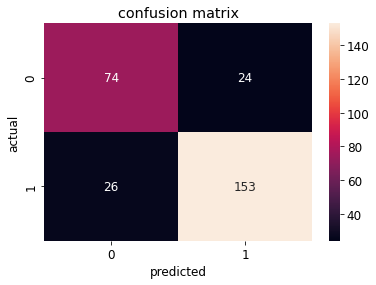

classification accuracy: 0.8194945848375451
classification error: 0.18050541516245489
false positive rate: 0.24489795918367346
precision: 0.864406779661017
ROC AUC Score: 0.8049253220841408


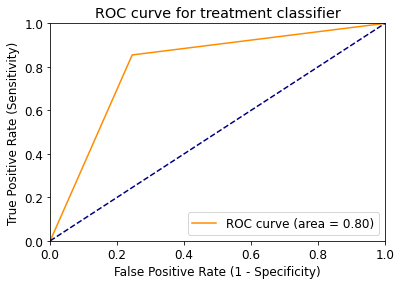

In [105]:
# ROC Curve for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression(max_iter = 10000)
    logreg.fit(xtr, ytr)
    
    # make class predictions for the testing set
    ypred = logreg.predict(xts)
    
    print('########### Logistic Regression ###############')
    
    accuracy_score = evalClassModel(logreg, yts, ypred, True)
    
    #Data for final graph
    methodDict['Log. Regres.'] = accuracy_score
logisticRegression()

########### Tree classifier ###############
null accuracy:
 1    179
0     98
Name: sought_treatment, dtype: int64
Percentage of ones: 0.6462093862815884
Percentage of zeros: 0.3537906137184116


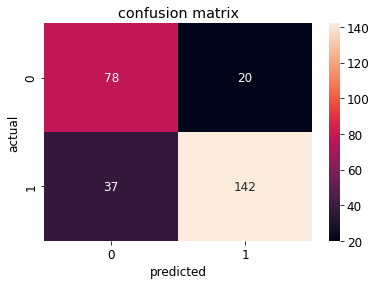

classification accuracy: 0.7942238267148014
classification error: 0.2057761732851986
false positive rate: 0.20408163265306123
precision: 0.8765432098765432
ROC AUC Score: 0.7946072283662068


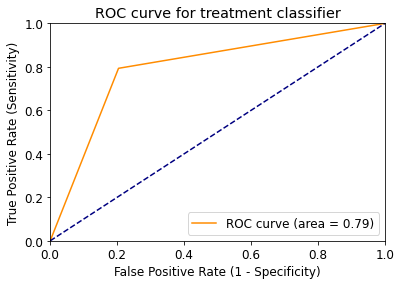

In [101]:
# ROC Curve for Decision Trees
methodDict = {}
rmseDict = ()
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(xtr, ytr)
    
    # make class predictions for the testing set
    ypred = tree.predict(xts)
    
    print('########### Tree classifier ###############')
    
    accuracy_score = evalClassModel(tree, yts, ypred, True)

    #Data for final graph
    methodDict['Tree clas.'] = accuracy_score
treeClassifier()
